In [ ]:
from numpy.lib.polynomial import RankWarning
import pandas as pd
from datetime import datetime
import datetime
import pytz
from google.colab import drive
#mount google drive
#drive.mount('/content/drive')
csvfilepath = '/content/drive/MyDrive/RP1data/test_SPSIRDATA.csv'
rawdf = pd.read_csv(csvfilepath)
display(rawdf)

,created_at,entry_id,field1,field2,field3
0,2023-11-11 12:15:41 UTC,1,IR2,0,2000-0-0T45:162:0
1,2023-11-11 12:18:32 UTC,2,IR3,1,2000-0-0T45:162:0
2,2023-11-11 12:18:49 UTC,3,IR1,0,2000-0-0T45:162:0
3,2023-11-11 12:20:49 UTC,4,IR4,1,2000-0-0T45:162:0
4,2023-11-11 12:31:37 UTC,5,IR1,1,2000-0-0T45:162:0
...,...,...,...,...,...
87,2023-11-21 13:07:21 UTC,7,IR2,0,2000-0-0T45:162:0
88,2023-11-21 23:31:15 UTC,8,IR1,1,2000-0-8T45:162:0
89,2023-11-21 12:15:41 UTC,1,IR2,0,2000-0-0T45:162:0
90,2023-11-21 22:18:32 UTC,2,IR3,1,2000-0-0T45:162:0


In [ ]:
#process raw dataframe
renamecolumns = {
    'created_at': 'Timestamp',
    'entry_id': 'entry_id',
    'field1': 'SlotID',
    'field2': 'Availability',
    'field3': 'field3'
}

df = rawdf.rename(columns=renamecolumns)
display(df)

,Timestamp,entry_id,SlotID,Availability,field3
0,2023-11-11 12:15:41 UTC,1,IR2,0,2000-0-0T45:162:0
1,2023-11-11 12:18:32 UTC,2,IR3,1,2000-0-0T45:162:0
2,2023-11-11 12:18:49 UTC,3,IR1,0,2000-0-0T45:162:0
3,2023-11-11 12:20:49 UTC,4,IR4,1,2000-0-0T45:162:0
4,2023-11-11 12:31:37 UTC,5,IR1,1,2000-0-0T45:162:0
...,...,...,...,...,...
87,2023-11-21 13:07:21 UTC,7,IR2,0,2000-0-0T45:162:0
88,2023-11-21 23:31:15 UTC,8,IR1,1,2000-0-8T45:162:0
89,2023-11-21 12:15:41 UTC,1,IR2,0,2000-0-0T45:162:0
90,2023-11-21 22:18:32 UTC,2,IR3,1,2000-0-0T45:162:0


In [ ]:
#extract features and target value
X = df[['SlotID']]
y = df['Availability']


In [ ]:
#split data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

#one-hot encode SlotID
encoder = OneHotEncoder(sparse=False, drop='first')
X_encoded = pd.DataFrame(encoder.fit_transform(X), columns= encoder.get_feature_names_out(['SlotID']))
#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
from datetime import datetime, timedelta
import pytz
#logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#create logistic regression model
model = LogisticRegression(random_state = 42)
#train logistic regresison model
model.fit(X_train, y_train)
#predict slot availability
y_pred = model.predict(X_test)

predslot = input("Enter SlotID: ")
#encode user input
predslot_enc = encoder.transform([[predslot]])

#predict slot availability
slot_prediction = model.predict(predslot_enc)
print(slot_prediction)
#if availability is predicted return the timestamp
if slot_prediction[0] == 1:
  #predict timestamp
  predicted_timestamp = df.loc[df['SlotID'] == predslot, 'Timestamp'].values[0]
  print(predicted_timestamp)
  print(f"Predicted next available time for SlotID {predslot} is: {predicted_timestamp}")
else:
  print(f"Predicted {predslot} will not be available!")


Enter SlotID: IR1
[1]
2023-11-11 12:18:49 UTC
Predicted next available time for SlotID IR1 is: 2023-11-11 12:18:49 UTC


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
#accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"model accuracy: ",accuracy)

model accuracy:  0.7368421052631579


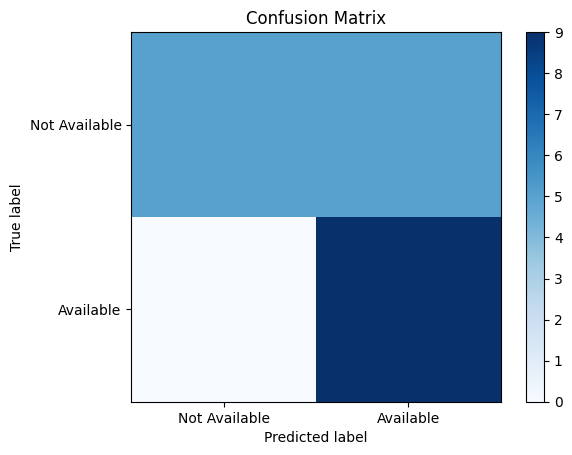

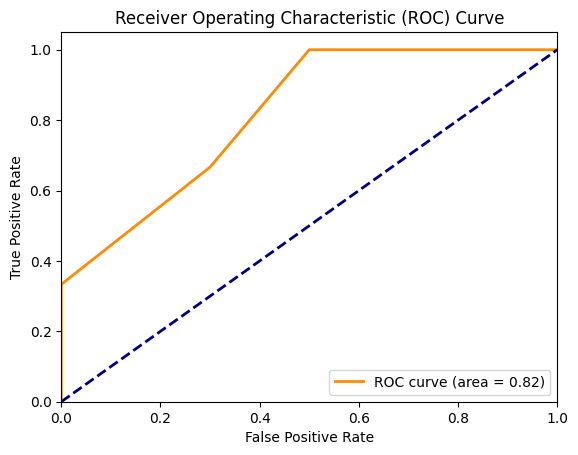

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Plot Confusion Matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()

    classes = ['Not Available', 'Available']
    tick_marks = [0, 1]
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Plot ROC Curve
def plot_roc_curve(y_true, y_scores):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred)

# Plot ROC Curve
y_scores = model.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_scores)


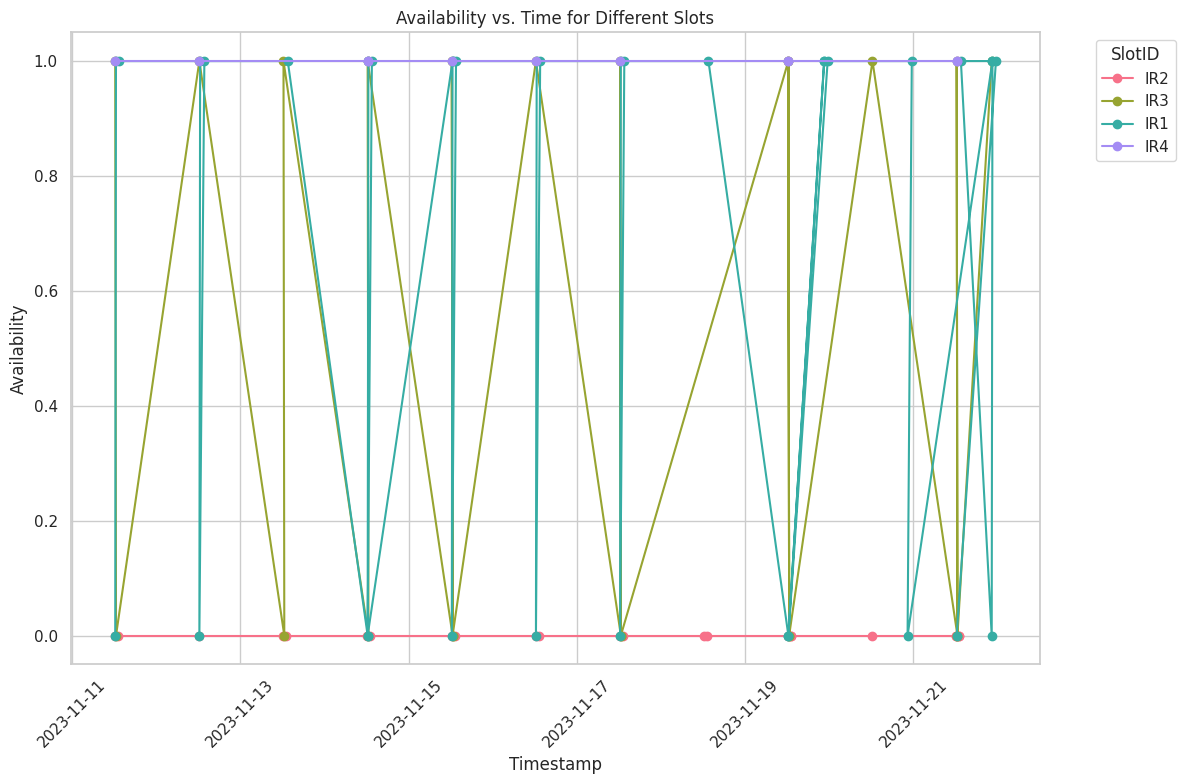

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assuming you have a DataFrame 'df' with columns 'Timestamp', 'SlotID', and 'Availability'
# If your Timestamp column is not already in datetime format, convert it
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set seaborn style for better aesthetics
sns.set(style="whitegrid")

# Define a color palette for different slots
palette = sns.color_palette("husl", len(df['SlotID'].unique()))

# Plot the availability of different slots over time
plt.figure(figsize=(12, 8))

for i, slot in enumerate(df['SlotID'].unique()):
    slot_data = df[df['SlotID'] == slot]
    plt.plot(slot_data['Timestamp'], slot_data['Availability'], marker='o', linestyle='-', label=slot, color=palette[i])

plt.title('Availability vs. Time for Different Slots')
plt.xlabel('Timestamp')
plt.ylabel('Availability')
plt.legend(title='SlotID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

